In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


Data cleaning and preprocessing

In [ ]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [ ]:
df.drop_duplicates()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


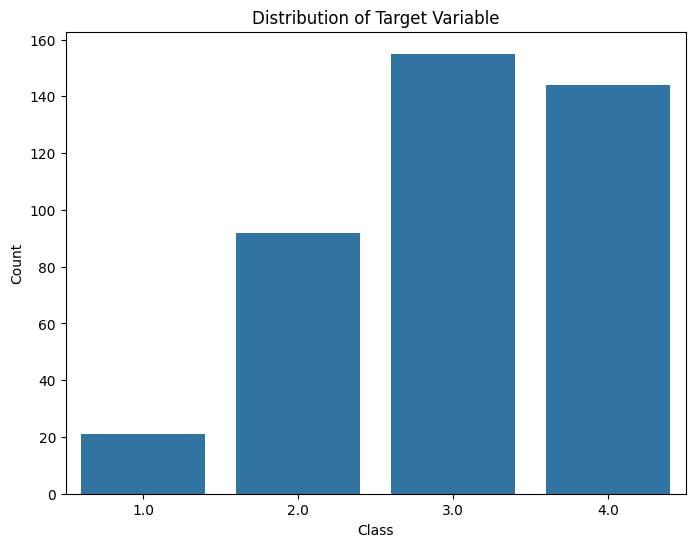

Class Distribution:
3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64


In [ ]:
# Check the distribution of the target variable
target_distribution = df['Stage'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Print the count of each class
print("Class Distribution:")
print(target_distribution)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
df=df.dropna()

In [ ]:
t = df['Stage'].value_counts()
t

3.0    111
4.0     94
2.0     59
1.0     12
Name: Stage, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
object_columns = df.select_dtypes(include='object').columns
#Label Encode the Object Variables
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])


In [ ]:
# Filling missing values with mean
df.fillna(df.mean(), inplace=True)

# Dropping rows with missing values
df.dropna(inplace=True)


In [ ]:
# Change 'Age' from days to years
df['Age'] = df['Age'] / 365.25
df['Age'] = df['Age'].astype(int)

df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,58,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0,56,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,0,70,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,0,54,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,38,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
# Convert float into integer for `Stage`
df['Stage'] = df['Stage'].astype(int)
df['Stage'] = df['Stage'].astype(str)
print(df['Stage'].unique())

['4' '3' '2' '1']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             276 non-null    int64  
 1   N_Days         276 non-null    int64  
 2   Status         276 non-null    int64  
 3   Drug           276 non-null    int64  
 4   Age            276 non-null    int64  
 5   Sex            276 non-null    int64  
 6   Ascites        276 non-null    int64  
 7   Hepatomegaly   276 non-null    int64  
 8   Spiders        276 non-null    int64  
 9   Edema          276 non-null    int64  
 10  Bilirubin      276 non-null    float64
 11  Cholesterol    276 non-null    float64
 12  Albumin        276 non-null    float64
 13  Copper         276 non-null    float64
 14  Alk_Phos       276 non-null    float64
 15  SGOT           276 non-null    float64
 16  Tryglicerides  276 non-null    float64
 17  Platelets      276 non-null    float64
 18  Prothrombi

In [ ]:
df.describe()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,158.615942,1979.166667,0.869565,0.507246,49.282609,0.123188,0.068841,0.514493,0.289855,0.213768,3.333696,371.260870,3.516812,100.768116,1996.611594,124.119239,124.978261,261.771739,10.735507
std,91.662926,1112.380295,0.959743,0.500856,10.500902,0.329250,0.253643,0.500698,0.454519,0.540665,4.601074,234.788363,0.404789,88.268746,2115.477894,56.719952,65.280761,93.128857,1.008315
min,1.000000,41.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,28.380000,33.000000,62.000000,9.000000
25%,79.750000,1185.750000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,249.500000,3.310000,42.750000,922.500000,82.457500,85.000000,200.000000,10.000000
50%,157.500000,1788.000000,0.000000,1.000000,49.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.400000,310.000000,3.545000,74.000000,1277.500000,116.625000,108.000000,257.000000,10.600000
75%,240.250000,2689.750000,2.000000,1.000000,56.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.525000,401.000000,3.772500,129.250000,2068.250000,153.450000,151.250000,318.250000,11.200000
max,312.000000,4556.000000,2.000000,1.000000,78.000000,1.000000,1.000000,1.000000,1.000000,2.000000,28.000000,1775.000000,4.400000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000


In [ ]:
# Rename the columns
df.rename(columns={'Tryglicerides': 'Triglycerides', 'Alk_Phos': 'ALP', 'SGOT': 'AST'}, inplace=True)
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Triglycerides,Platelets,Prothrombin,Stage
0,1,400,2,0,58,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,0,0,56,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,2,0,70,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,2,0,54,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,1,1,38,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


In [ ]:
# Check for duplicated rows
duplicated_rows = df[df.duplicated()]

# Group by the duplicated rows and calculate their sum
sum_of_duplicated_rows = duplicated_rows.groupby(duplicated_rows.columns.tolist()).size().reset_index(name='count')

# Display the sum of duplicated rows
print(sum_of_duplicated_rows)

Empty DataFrame
Columns: [ID, N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, ALP, AST, Triglycerides, Platelets, Prothrombin, Stage, count]
Index: []

[0 rows x 21 columns]


EDA

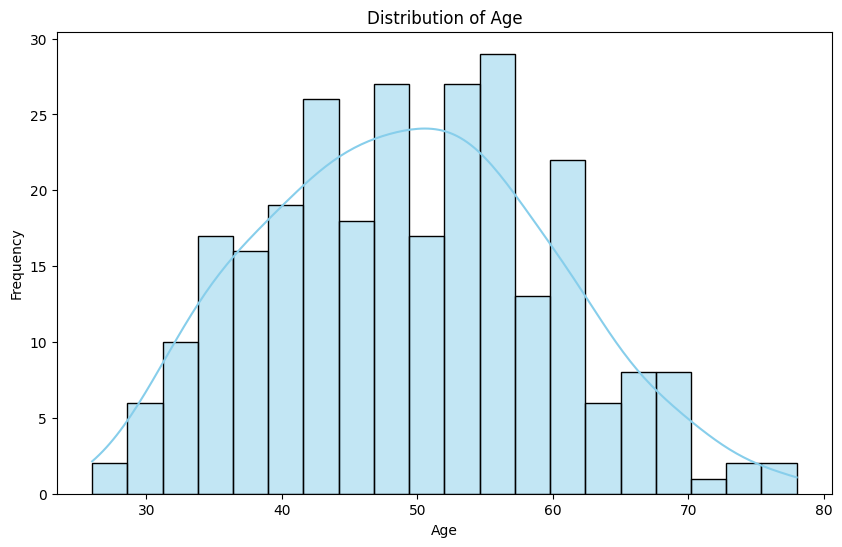

In [ ]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

inference:

histogram plot showing the distribution of ages in the dataset, with a kernel density estimate overlay, and the x-axis representing age and the y-axis representing frequency.



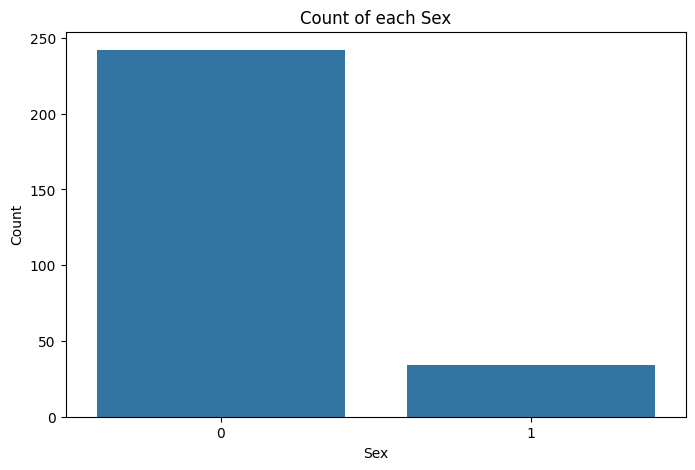

In [ ]:
# Count of each sex
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df)
plt.title('Count of each Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


inference:

count plot showing the distribution of sexes in the dataset, with two bars representing the count of each sex category (e.g., male and female).

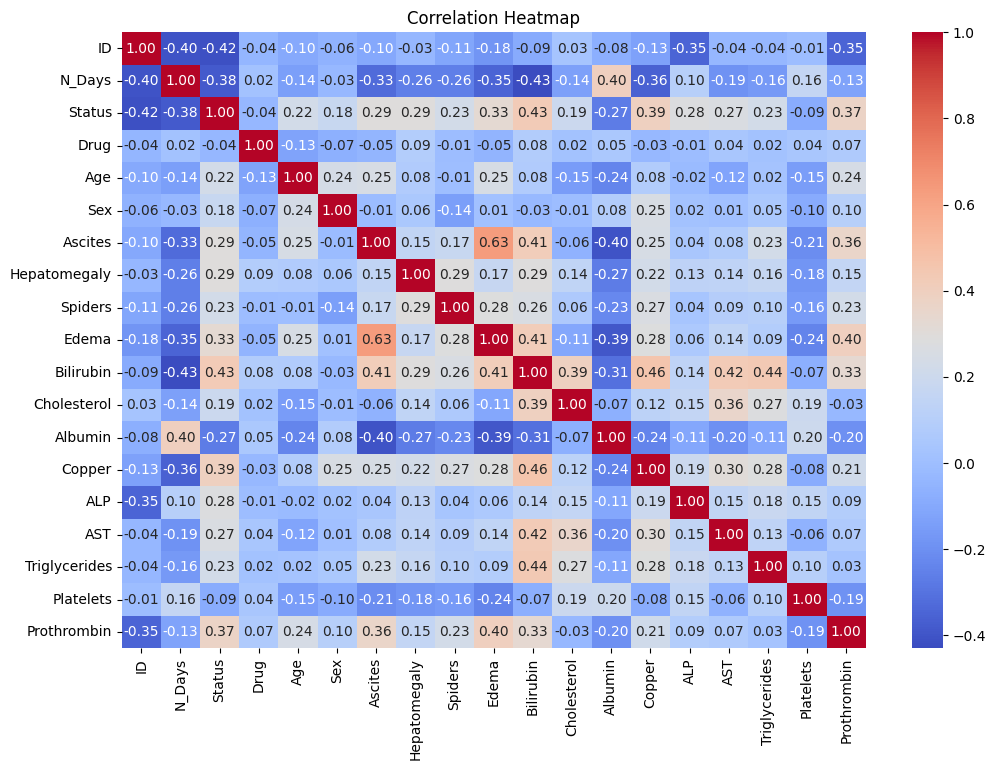

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Inference:

 heatmap showing the pairwise correlations between numerical variables in the dataset. Darker colors indicate stronger correlations, while lighter colors indicate weaker correlations or no correlation. The annotations within the heatmap display the correlation coefficients.

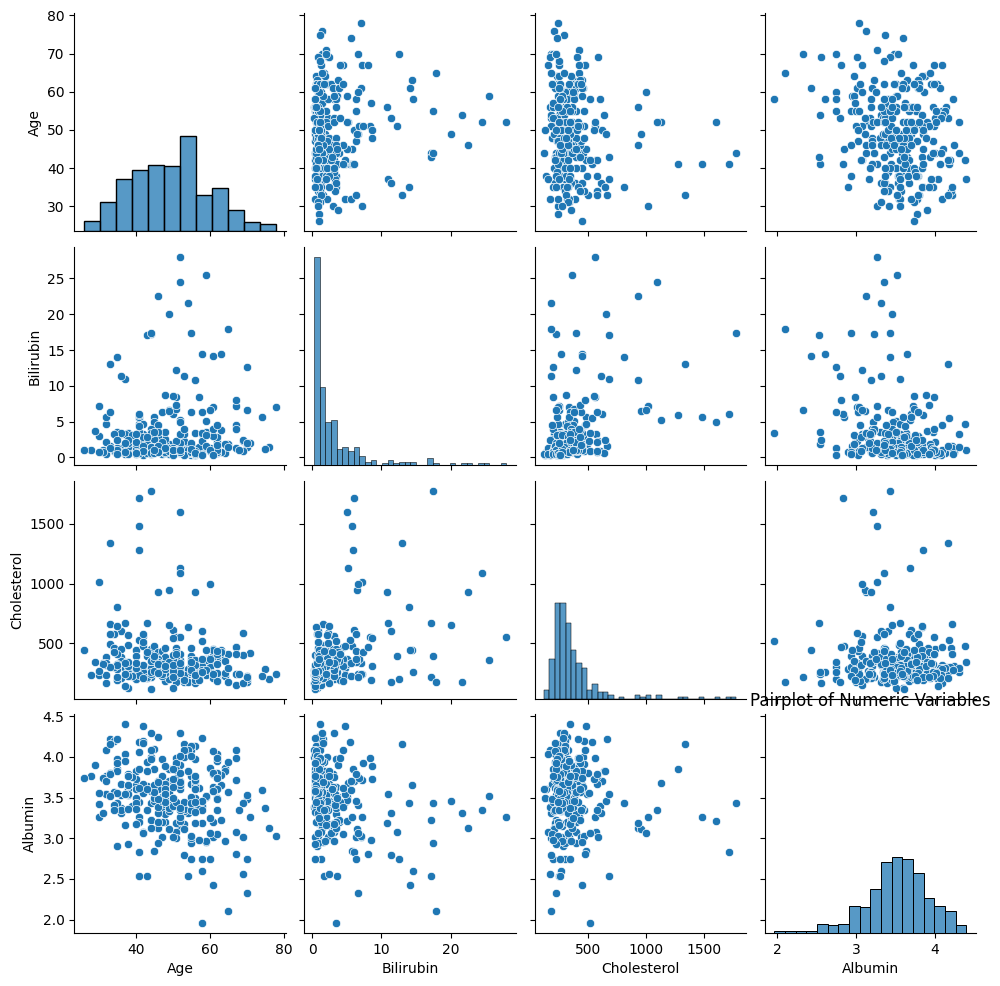

In [ ]:
# Pairplot for numeric variables
sns.pairplot(df[['Age', 'Bilirubin', 'Cholesterol', 'Albumin']])
plt.title('Pairplot of Numeric Variables')
plt.show()

Inference:

grid of scatterplots where each scatterplot represents the relationship between a pair of numeric variables. This visualization helps in understanding the relationships and potential correlations between the selected numeric variables.

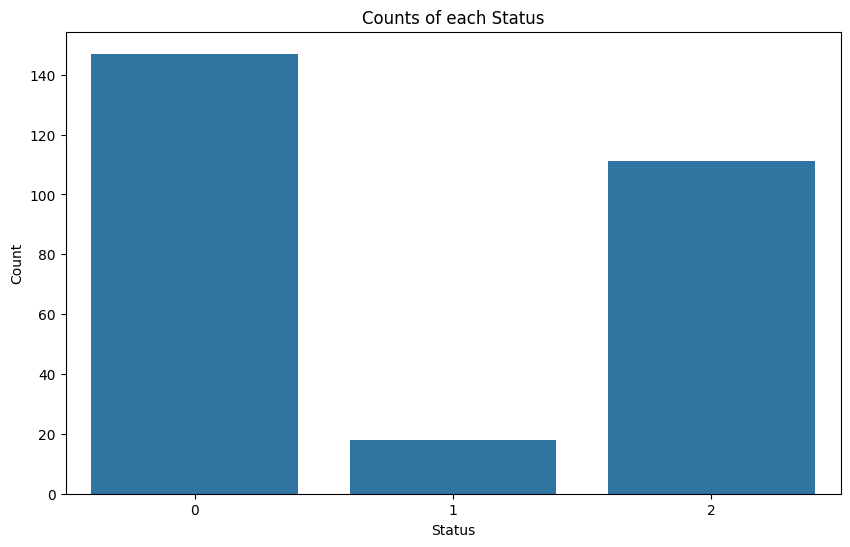

In [ ]:
# Bar chart showing counts of each status
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=df)
plt.title('Counts of each Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

Inference:

The bar chart showing the counts of each category in the 'Status' column of the dataset. Each bar represents the count of a specific status category.


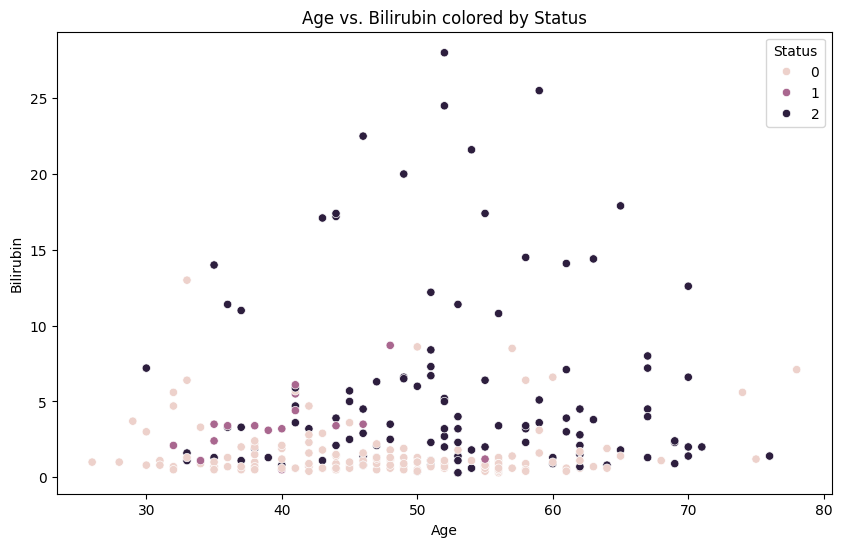

In [ ]:
# Scatter plot of Age vs. Bilirubin colored by Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Bilirubin', hue='Status', data=df)
plt.title('Age vs. Bilirubin colored by Status')
plt.xlabel('Age')
plt.ylabel('Bilirubin')
plt.show()

Inference:

scatter plot where each point represents an observation, with 'Age' on the x-axis, 'Bilirubin' on the y-axis, and points colored based on the 'Status' category. This visualization helps in understanding the relationship between 'Age' and 'Bilirubin', as well as how the distribution varies with different statuses

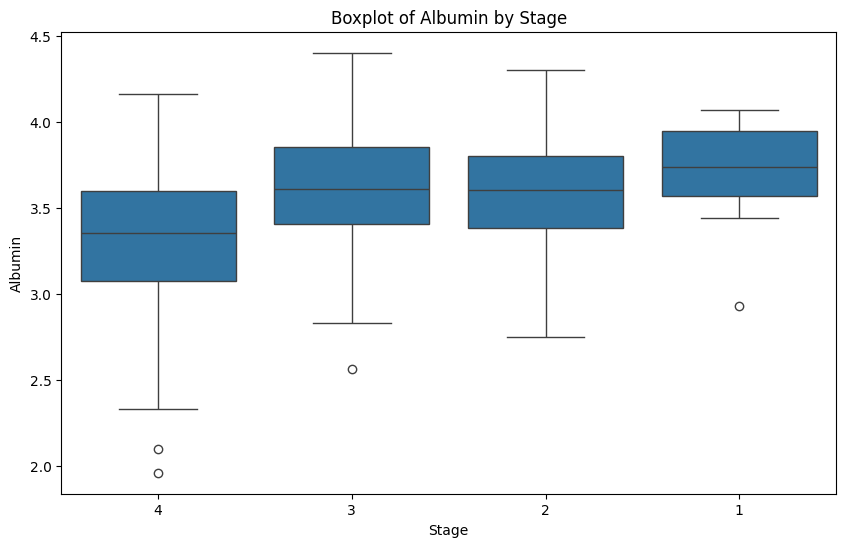

In [ ]:
# Boxplot of Albumin by Stage
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stage', y='Albumin', data=df)
plt.title('Boxplot of Albumin by Stage')
plt.xlabel('Stage')
plt.ylabel('Albumin')
plt.show()

Inference:

 box plot where each box represents the distribution of 'Albumin' values for a specific stage. This visualization helps in understanding the distribution of 'Albumin' values across different stages and identifying any potential variations or outliers.

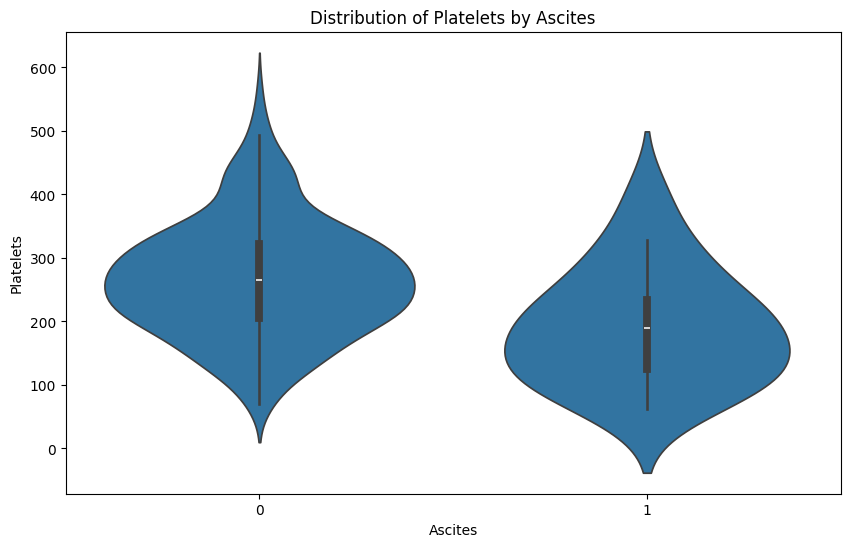

In [ ]:
# Distribution of Platelets by Ascites
plt.figure(figsize=(10, 6))
sns.violinplot(x='Ascites', y='Platelets', data=df)
plt.title('Distribution of Platelets by Ascites')
plt.xlabel('Ascites')
plt.ylabel('Platelets')
plt.show()

Inference:

violin plot where each violin represents the distribution of 'Platelets' values for a specific category of 'Ascites'. This visualization helps in understanding the distribution of 'Platelets' values across different categories of 'Ascites' and identifying any potential patterns or differences.

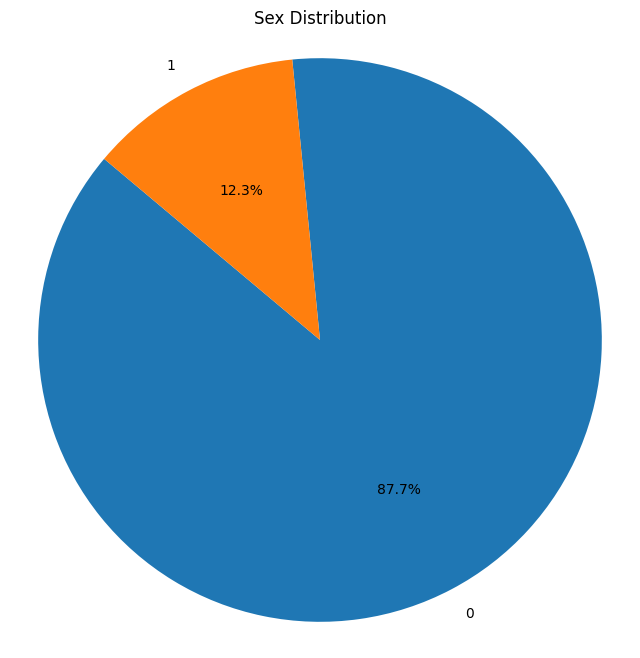

In [ ]:
# Pie chart for Sex distribution
sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sex Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Inference:

pie chart where each wedge represents the proportion of each sex category in the dataset. The percentage labels indicate the proportion of each category relative to the total.


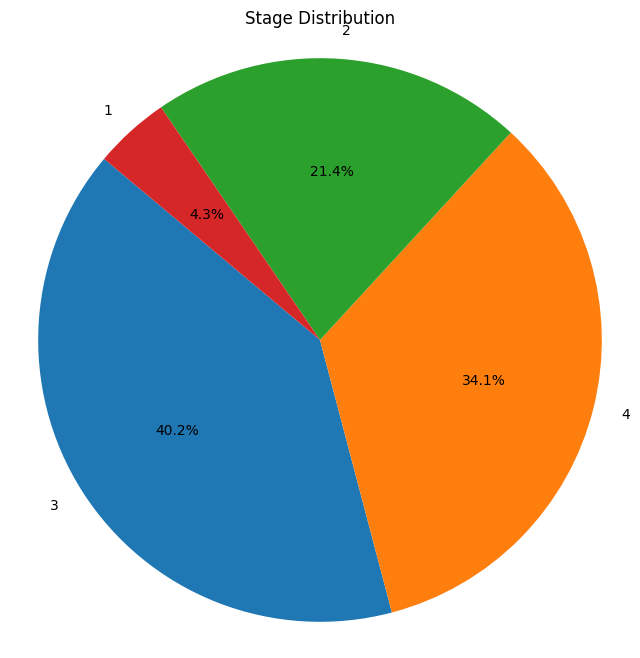

In [ ]:
# Pie chart for Stage distribution
stage_counts = df['Stage'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(stage_counts, labels=stage_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Stage Distribution')
plt.axis('equal')
plt.show()


Inference:

pie chart where each wedge represents the proportion of each stage category in the dataset. The percentage labels indicate the proportion of each category relative to the total.

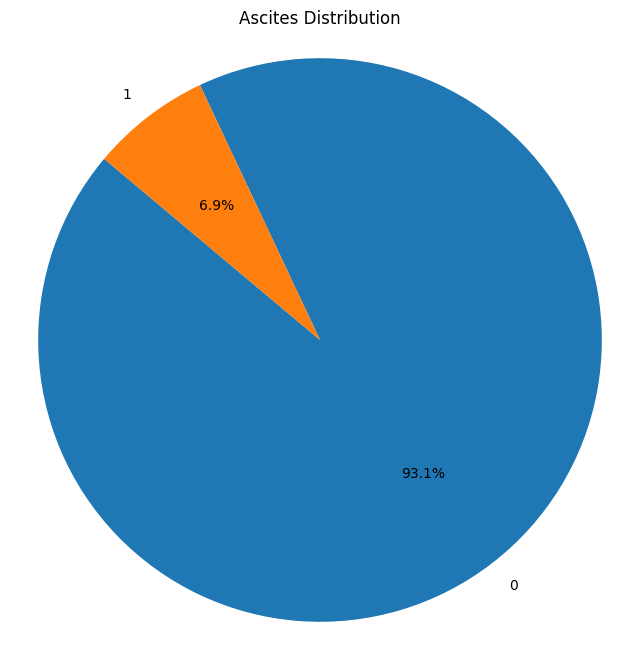

In [ ]:
# Pie chart for Ascites distribution
ascites_counts = df['Ascites'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ascites_counts, labels=ascites_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ascites Distribution')
plt.axis('equal')
plt.show()


Inference:

pie chart where each wedge represents the proportion of each ascites category in the dataset. The percentage labels indicate the proportion of each category relative to the total.

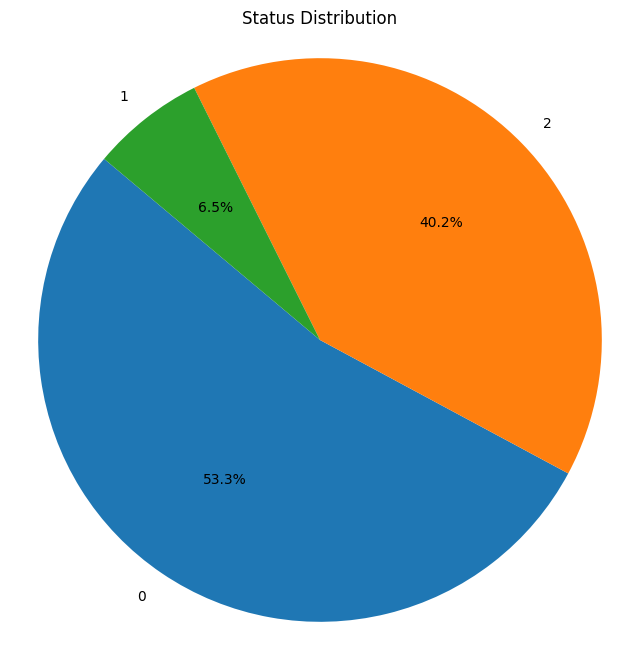

In [ ]:
# Pie chart for Status distribution
status_counts = df['Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Status Distribution')
plt.axis('equal')
plt.show()

Inference:

pie chart where each wedge represents the proportion of each status category in the dataset. The percentage labels indicate the proportion of each category relative to the total.

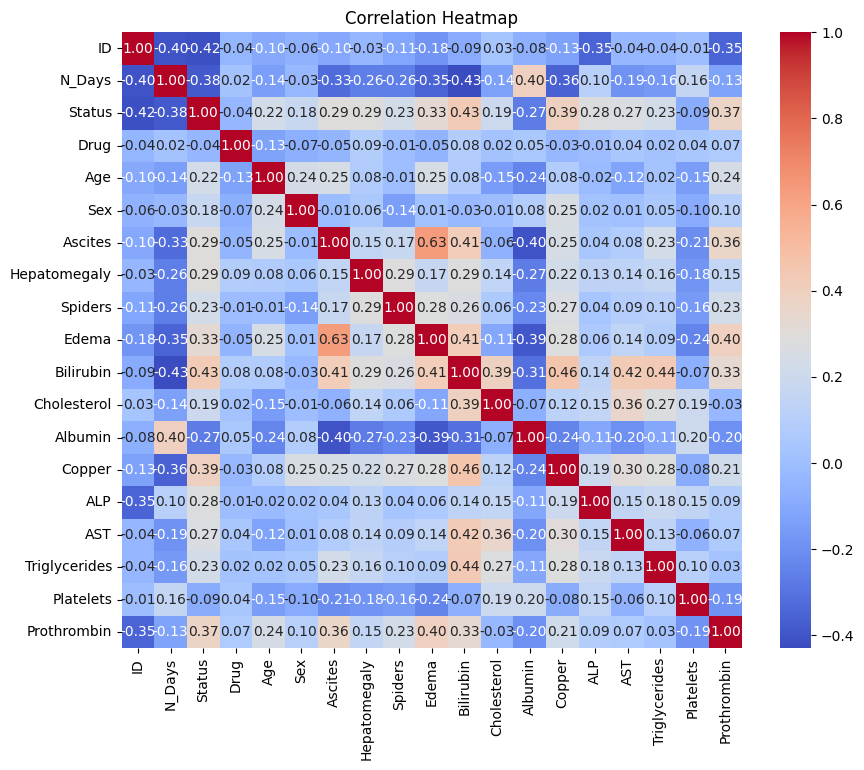

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()




Inference:

heatmap visualizing the correlations between the numerical variables in the DataFrame. Darker colors indicate stronger positive correlations, while lighter colors indicate weaker correlations or negative correlations. The annotations within the heatmap display the correlation coefficients.

Data splitting

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define X (features) and y (target)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming X_train and y_train are your features and target variable
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({'3': 87, '4': 74, '2': 48, '1': 11})
After SMOTE: Counter({'4': 87, '2': 87, '3': 87, '1': 87})


Model Building

In [ ]:
# Create a Logistic Regression classifier
lr = LogisticRegression()

# Train the classifier on the training data
lr.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.32
Confusion Matrix:
[[1 0 0 0]
 [4 3 3 1]
 [5 7 6 6]
 [5 5 2 8]]
Classification Report:
              precision    recall  f1-score   support

           1       0.07      1.00      0.12         1
           2       0.20      0.27      0.23        11
           3       0.55      0.25      0.34        24
           4       0.53      0.40      0.46        20

    accuracy                           0.32        56
   macro avg       0.34      0.48      0.29        56
weighted avg       0.46      0.32      0.36        56



In [ ]:
# Cross validation score (Logistic regression)
score = cross_val_score(lr, X, y,cv=5)
score

array([0.42857143, 0.49090909, 0.4       , 0.47272727, 0.56363636])

In [ ]:
# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train Decision Tree classifier
dt_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using Decision Tree
dt_y_pred = dt_classifier.predict(X_test)

# Evaluate Decision Tree performance
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_class_report = classification_report(y_test, dt_y_pred)

# Print Decision Tree evaluation results
print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy:.2f}")
print("Confusion Matrix:")
print(dt_conf_matrix)
print("Classification Report:")
print(dt_class_report)

Decision Tree Classifier:
Accuracy: 0.34
Confusion Matrix:
[[ 0  0  1  0]
 [ 2  3  6  0]
 [ 2 10  5  7]
 [ 0  3  6 11]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.19      0.27      0.22        11
           3       0.28      0.21      0.24        24
           4       0.61      0.55      0.58        20

    accuracy                           0.34        56
   macro avg       0.27      0.26      0.26        56
weighted avg       0.37      0.34      0.35        56



In [ ]:
# Cross validation score (Decision Tree)
dt_score = cross_val_score(dt_classifier, X, y,cv=5)
dt_score

array([0.39285714, 0.34545455, 0.43636364, 0.4       , 0.43636364])

In [ ]:
# Initialize SVC model
svm_classifier = SVC()

# Train (fit) the model with training data
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on test data
svm_y_pred = svm_classifier.predict(X_test)

# Evaluate SVM performance
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
svm_class_report = classification_report(y_test, svm_y_pred)

# Print SVM evaluation results
print("\nSVM Classifier:")
print(f"Accuracy: {svm_accuracy:.2f}")
print("Confusion Matrix:")
print(svm_conf_matrix)
print("Classification Report:")
print(svm_class_report)


SVM Classifier:
Accuracy: 0.38
Confusion Matrix:
[[ 0  1  0  0]
 [ 5  5  0  1]
 [ 4 13  2  5]
 [ 3  3  0 14]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.23      0.45      0.30        11
           3       1.00      0.08      0.15        24
           4       0.70      0.70      0.70        20

    accuracy                           0.38        56
   macro avg       0.48      0.31      0.29        56
weighted avg       0.72      0.38      0.38        56



In [ ]:
# Cross validation score (SVM)
svm_score = cross_val_score(svm_classifier, X, y,cv=5)
svm_score

array([0.55357143, 0.45454545, 0.45454545, 0.50909091, 0.50909091])

In [ ]:
# Create Naive Bayes classifier
nb_classifier = GaussianNB()

# Train Naive Bayes classifier
nb_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using Naive Bayes
nb_y_pred = nb_classifier.predict(X_test)

# Evaluate Naive Bayes performance
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
nb_class_report = classification_report(y_test, nb_y_pred)

# Print Naive Bayes evaluation results
print("\nNaive Bayes Classifier:")
print(f"Accuracy: {nb_accuracy:.2f}")
print("Confusion Matrix:")
print(nb_conf_matrix)
print("Classification Report:")
print(nb_class_report)


Naive Bayes Classifier:
Accuracy: 0.32
Confusion Matrix:
[[ 0  1  0  0]
 [ 5  3  3  0]
 [ 6  7  5  6]
 [ 2  5  3 10]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.19      0.27      0.22        11
           3       0.45      0.21      0.29        24
           4       0.62      0.50      0.56        20

    accuracy                           0.32        56
   macro avg       0.32      0.25      0.27        56
weighted avg       0.45      0.32      0.36        56



In [ ]:
# Cross validation score (Naive)
nb_score = cross_val_score(nb_classifier, X, y,cv=5)
nb_score

array([0.53571429, 0.38181818, 0.23636364, 0.30909091, 0.34545455])

In [ ]:
# Create KNN classifier
knn_classifier = KNeighborsClassifier()

# Train KNN classifier
knn_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using KNN
knn_y_pred = knn_classifier.predict(X_test)

# Evaluate KNN performance
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_class_report = classification_report(y_test, knn_y_pred)

# Print KNN evaluation results
print("\nKNN Classifier:")
print(f"Accuracy: {knn_accuracy:.2f}")
print("Confusion Matrix:")
print(knn_conf_matrix)
print("Classification Report:")
print(knn_class_report)


KNN Classifier:
Accuracy: 0.27
Confusion Matrix:
[[1 0 0 0]
 [8 0 3 0]
 [6 7 7 4]
 [5 7 1 7]]
Classification Report:
              precision    recall  f1-score   support

           1       0.05      1.00      0.10         1
           2       0.00      0.00      0.00        11
           3       0.64      0.29      0.40        24
           4       0.64      0.35      0.45        20

    accuracy                           0.27        56
   macro avg       0.33      0.41      0.24        56
weighted avg       0.50      0.27      0.33        56



In [ ]:
# Cross validation score (KNN)
knn_score = cross_val_score(knn_classifier, X, y,cv=5)
knn_score

array([0.5       , 0.41818182, 0.38181818, 0.45454545, 0.36363636])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create KNN classifier
rm_classifier =RandomForestClassifier()

# Train KNN classifier
rm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using KNN
rm_y_pred = rm_classifier.predict(X_test)

# Evaluate KNN performance
rm_accuracy = accuracy_score(y_test, rm_y_pred)
rm_conf_matrix = confusion_matrix(y_test, rm_y_pred)
rm_class_report = classification_report(y_test, rm_y_pred)

# Print KNN evaluation results
print("\n RF Classifier:")
print(f"Accuracy: {rm_accuracy:.2f}")
print("Confusion Matrix:")
print(rm_conf_matrix)
print("Classification Report:")
print(rm_class_report)


 RF Classifier:
Accuracy: 0.39
Confusion Matrix:
[[ 0  1  0  0]
 [ 2  1  6  2]
 [ 1  8  7  8]
 [ 2  1  3 14]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.09      0.09      0.09        11
           3       0.44      0.29      0.35        24
           4       0.58      0.70      0.64        20

    accuracy                           0.39        56
   macro avg       0.28      0.27      0.27        56
weighted avg       0.41      0.39      0.40        56



In [ ]:
# Cross validation score (Random Forest)
rm_score = cross_val_score(rm_classifier,X,y,cv=5)
rm_score

array([0.53571429, 0.61818182, 0.38181818, 0.50909091, 0.41818182])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
gb_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.43


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy: {:.2f}".format(rf_accuracy))

# AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(X_resampled, y_resampled)
adaboost_predictions = adaboost_classifier.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Accuracy: {:.2f}".format(adaboost_accuracy))

Random Forest Accuracy: 0.38
AdaBoost Accuracy: 0.30


In [ ]:
#Hyperparamater tunning

# Define parameter grids for each model
param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
param_grid_decision_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
param_grid_random_forest = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
param_grid_gradient_boosting = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.8, 1.0]}
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
param_grid_naive_bayes = {}  # No hyperparameters to tune for traditional naive Bayes

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': param_grid_logistic,
    'SVM': param_grid_svm,
    'Decision Tree': param_grid_decision_tree,
    'Random Forest': param_grid_random_forest,
    'Gradient Boosting': param_grid_gradient_boosting,
    'KNN': param_grid_knn,
    'Naive Bayes': param_grid_naive_bayes
}

# Perform grid search with cross-validation for each model
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_resampled, y_train_resampled)

    print("Best parameters found:")
    print(grid_search.best_params_)
    print("Best cross-validation score:")
    print(grid_search.best_score_)
    print("\n")

Tuning hyperparameters for Logistic Regression...
Best parameters found:
{'C': 1}
Best cross-validation score:
0.6609109730848861


Tuning hyperparameters for SVM...
Best parameters found:
{'C': 100, 'gamma': 0.1}
Best cross-validation score:
0.7790062111801243


Tuning hyperparameters for Decision Tree...
Best parameters found:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score:
0.6525465838509318


Tuning hyperparameters for Random Forest...
Best parameters found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score:
0.7560248447204969


Tuning hyperparameters for Gradient Boosting...
Best parameters found:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validation score:
0.7501863354037267


Tuning hyperparameters for KNN...
Best parameters found:
{'metric': 'euclidean', 'n_neighbors': 3}
Best cross-validation score:
0.6784679089026916


T

In [ ]:
from sklearn.model_selection import cross_val_score

# Dictionary to store cross-validation scores for each model
cv_scores = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Store the mean cross-validation score for the model
    cv_scores[model_name] = scores.mean()

# Print cross-validation scores for each model
for model_name, score in cv_scores.items():
    print(f"Model: {model_name}, Mean CV Accuracy: {score}")




Model: Logistic Regression, Mean CV Accuracy: 0.5136363636363637
Model: SVM, Mean CV Accuracy: 0.46818181818181814
Model: Decision Tree, Mean CV Accuracy: 0.4136363636363637
Model: Random Forest, Mean CV Accuracy: 0.5227272727272727
Model: Gradient Boosting, Mean CV Accuracy: 0.5136363636363637
Model: KNN, Mean CV Accuracy: 0.4545454545454545
Model: Naive Bayes, Mean CV Accuracy: 0.37272727272727274


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print the results
print("Model Performance:")
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.4f}")

# Find the best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy = {results[best_model]:.4f}")

# Optionally, you can print more detailed performance metrics like classification report for each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Find the best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy = {results[best_model]:.4f}")



Model Performance:
Random Forest: Accuracy = 0.4107
SVM: Accuracy = 0.5000
Decision Tree: Accuracy = 0.4107
Logistic Regression: Accuracy = 0.4464
KNN: Accuracy = 0.5000
Naive Bayes: Accuracy = 0.3036
Gradient Boosting: Accuracy = 0.4286

Best Model: SVM with Accuracy = 0.5000

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.12      0.09      0.11        11
           3       0.42      0.46      0.44        24
           4       0.64      0.70      0.67        20

    accuracy                           0.46        56
   macro avg       0.30      0.31      0.30        56
weighted avg       0.43      0.46      0.45        56


SVM Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.12      0.09      0.11        11
           3       0.48      0.50      0.49        24
    

In [ ]:
from sklearn.ensemble import StackingClassifier

# Define a list of base models
base_models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Initialize a stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train the stacking classifier
stacking_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the stacking classifier
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking}")


Stacking Classifier Accuracy: 0.3392857142857143


In [ ]:
# Assuming you have already trained the best model and stored it in best_model variable

# Sample new patient data (features) with no liver cirrhosis
new_patient_data_no_cirrhosis = np.array([[301,   # ID
                                          90,    # N_Days
                                          0,     # Status (0 for no liver cirrhosis)
                                          1,     # Drug (1 for drug A, 0 for drug B)
                                          35,    # Age
                                          0,     # Sex (1 for male, 0 for female)
                                          0,     # Ascites (1 for present, 0 for absent)
                                          0,     # Hepatomegaly (1 for present, 0 for absent)
                                          0,     # Spiders (1 for present, 0 for absent)
                                          0,     # Edema (1 for present, 0 for absent)
                                          0.6,   # Bilirubin level
                                          150,   # Cholesterol level
                                          4.2,   # Albumin level
                                          70,    # Copper level
                                          100,   # ALP level
                                          25,    # AST level
                                          90,    # Triglycerides level
                                          400000,# Platelets count
                                          45,    # Prothrombin time (in seconds)
                                           ]])

# Make prediction
prediction = lr.predict(new_patient_data_no_cirrhosis)

print(prediction)


[1.]


In [ ]:
# Assuming you have already trained the best model and stored it in best_model variable

# Sample new patient data (features) with no liver cirrhosis
new_patient_data_no_cirrhosis = np.array([[
                                          90,    # N_Days
                                          0,     # Status (0 for no liver cirrhosis)
                                          1,     # Drug (1 for drug A, 0 for drug B)
                                          35,    # Age
                                          0,     # Sex (1 for male, 0 for female)
                                          0,     # Ascites (1 for present, 0 for absent)
                                          0,     # Hepatomegaly (1 for present, 0 for absent)
                                          0,     # Spiders (1 for present, 0 for absent)
                                          0,     # Edema (1 for present, 0 for absent)
                                          0.6,   # Bilirubin level
                                          150,   # Cholesterol level
                                          4.2,   # Albumin level
                                          70,    # Copper level
                                          100,   # ALP level
                                          25,    # AST level
                                          90,    # Triglycerides level
                                          400000,# Platelets count
                                          45,    # Prothrombin time (in seconds)
                                           ]])

# Make prediction
prediction = rf_best_model .predict(new_patient_data_no_cirrhosis)

print(prediction)

[0]


In [ ]:
# Assuming you have already trained the best model and stored it in best_model variable

# Sample new patient data (features) with no liver cirrhosis
import numpy as np

new_patient_data_no_cirrhosis = np.array([
    [120, 0, 1, 42, 1, 0, 0, 0, 0, 0.8, 160, 4.5, 80, 110, 30, 100, 4500000, 40]
])




# Make prediction
prediction = rf_best_model .predict(new_patient_data_no_cirrhosis)

print(prediction)

[2]
